In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras import backend
from keras.optimizers import RMSprop, Adam
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.models import load_model

from keras.utils import to_categorical

def unpickle(file, train=True):
    import pickle
    with open('./cifar-10-batches-py/'+(('data_batch_'+str(file)) if train else 'test_batch'), 'rb') as fo:
        dict_d = pickle.load(fo,encoding='latin-1')
    return np.reshape(dict_d['data'],(10000,3,32,32)).transpose(0, 2, 3, 1), dict_d['labels']
# def normalization(x):
#     return x/255

training_set = []
training_label = []
for i in range(1,5):
    x,y = unpickle(i)
    training_set.extend(x) 
    training_label.extend(y)

test_data,test_label = unpickle(5)

test_data_norm = np.array(test_data) / 255
test_label_one_hot_encoded = to_categorical(test_label)

training_set_norm = np.array(training_set) / 255
training_label_one_hot_encode = to_categorical(training_label)

batch_size = 128
epochs = 10
IMG_HEIGHT = 32
IMG_WIDTH = 32

labels_name = [
"airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"
]

Using TensorFlow backend.


In [2]:
counts = [0]*10
for i in training_label:
    counts[i] += 1
counts

[3986, 3986, 4048, 3984, 4003, 3975, 4020, 4023, 3997, 3978]

In [5]:


# def plotImages(images_arr,lab):
#     from matplotlib import pyplot as plt
#     fig, axes = plt.subplots(1, 5, figsize=(10,10))
#     axes = axes.flatten()
#     for img, ax in zip( images_arr, axes):
#         ax.imshow(img)
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()
#     for i in lab[:5]:
#         print(labels_name[i], end=' ')

# for i in range(0,20,5):
#     plotImages(training_set_norm[i:i+5],training_label[i:i+5])

weight_decay = 1e-4
num_classes=10
datagen2 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen2.fit(training_set_norm)
def lr_schedule(epoch):
    lrate = 0.00001
    if epoch > 20:
        lrate = 0.000075
    if epoch > 40:
        lrate = 0.00003
    if epoch > 80:
        lrate = 0.000005
    if epoch > 160:
        lrate = 0.000001
    if epoch > 200:
        lrate = 0.0000007
    if epoch > 240:
        lrate = 0.0000004
    if epoch > 300:
        lrate = 0.0000001
    if epoch > 400:
        lrate = 0.00000005
    if epoch > 500:
        lrate = 0.00000001
    if epoch % 40 == 0:
        model.save('./modelX.h5')
    return lrate
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='same',
                 input_shape=training_set_norm.shape[1:]))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(3072))
model.add(Activation('relu'))
model.add(Dense(12288))
model.add(Activation('relu'))
model.add(Dense(12288))
model.add(Activation('relu'))
model.add(Dense(12288))
model.add(Activation('relu'))
model.add(Dense(3072))
model.add(Activation('relu'))
model.add(Dense(1536))
model.add(Activation('relu'))
model.add(Dense(768))
model.add(Activation('relu'))
model.add(Dense(768))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

opt = RMSprop(lr=0.0001, decay=1e-6)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format="channels_last",
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
datagen.fit(training_set_norm)







In [6]:
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history2 = model.fit_generator(
    datagen2.flow(training_set_norm, training_label_one_hot_encode, batch_size=32),\
        steps_per_epoch=training_set_norm.shape[0] // 32,epochs=600,\
        verbose=1,
    validation_data=(test_data_norm,test_label_one_hot_encoded),
    callbacks=[LearningRateScheduler(lr_schedule)],
    initial_epoch=0
)
accuracy2 = model.evaluate(x=test_data_norm,y=test_label_one_hot_encoded,batch_size=32)
print("Accuracy: ",accuracy2[1])
model.save('./modelX.h5')

Epoch 1/600


RuntimeError: Can't decrement id ref count (unable to extend file properly)

In [ ]:
pickle.dump(open('history','wb'))

[8.8817042e-01 8.5619086e-04 8.6493365e-02 9.5680971e-03 7.6384528e-04
 9.0509088e-04 1.0230161e-02 6.9661217e-04 1.4839149e-03 8.3231204e-04]
[8.6268914e-01 4.2948342e-04 1.1256025e-01 9.2519224e-03 1.2233211e-03
 1.1144289e-03 1.0035973e-02 8.2471152e-04 1.3684825e-03 5.0229707e-04]
[9.9777991e-01 7.7396093e-05 1.9703349e-03 5.7764355e-05 2.1633339e-06
 2.5987902e-06 2.7211423e-05 7.7250925e-06 6.1408267e-05 1.3355506e-05]
[0.49145004 0.01048191 0.24356073 0.08022135 0.02446058 0.01984497
 0.0804041  0.01517796 0.02190663 0.01249179]
[9.9960929e-01 1.6188680e-05 3.5530253e-04 4.7823169e-06 1.3392132e-07
 1.7137295e-07 1.7365458e-06 1.0512091e-06 1.0011713e-05 1.3322687e-06]
[0.7568254  0.00118792 0.17939767 0.02212866 0.0044622  0.00352833
 0.02410525 0.00290811 0.00395753 0.00149888]
[8.3004242e-01 6.6310703e-04 1.3406928e-01 1.2542544e-02 2.1108335e-03
 1.6408176e-03 1.4575048e-02 1.4176116e-03 2.1696293e-03 7.6866918e-04]
[9.9999511e-01 5.4543534e-07 4.2074585e-06 1.1456472e-08 8.

 7.7604852e-04 7.7799032e-03 7.1232958e-04 1.2997953e-03 4.1273839e-04]
[9.6618718e-01 2.7488801e-04 2.9223554e-02 1.6704511e-03 1.4265353e-04
 1.3175442e-04 1.5406185e-03 1.6479875e-04 5.0778053e-04 1.5639301e-04]
[0.72959554 0.00087886 0.20120116 0.02307349 0.00432148 0.00367949
 0.0301662  0.00288303 0.00300438 0.00119641]
[0.8299191  0.00093376 0.13074994 0.0138012  0.00243196 0.00187392
 0.01478434 0.00164429 0.00283901 0.0010225 ]
[8.6071980e-01 4.8702396e-04 1.1366806e-01 9.2097167e-03 1.4346846e-03
 1.1598062e-03 1.0236040e-02 9.3864504e-04 1.6078744e-03 5.3831574e-04]
[0.750794   0.0014466  0.1804478  0.02410493 0.00521416 0.00393776
 0.02408526 0.00329011 0.00488491 0.00179441]
[8.2709461e-01 7.6740014e-04 1.3534178e-01 1.2775191e-02 2.3925346e-03
 1.7824491e-03 1.4938847e-02 1.5697210e-03 2.4925063e-03 8.4489083e-04]
[8.57819617e-01 5.16380067e-04 1.15202114e-01 9.35875345e-03
 1.49315246e-03 1.17707415e-03 1.12172104e-02 9.99926939e-04
 1.65263680e-03 5.63124951e-04]
[8.707

 1.5617114e-05 2.1567396e-04 4.0654308e-05 1.3529627e-04 3.0423016e-05]
[8.5548145e-01 5.9126859e-04 1.1618342e-01 1.0151064e-02 1.6564078e-03
 1.2891606e-03 1.1007490e-02 1.0787871e-03 1.9165473e-03 6.4441405e-04]
[8.63500953e-01 5.47861331e-04 1.10074945e-01 8.98134336e-03
 1.43938081e-03 1.09437597e-03 1.11147044e-02 9.93734109e-04
 1.68071536e-03 5.71952376e-04]
[9.9984419e-01 2.1050775e-05 1.2417111e-04 1.7622084e-06 3.0728589e-08
 4.9423626e-08 4.3215590e-07 4.0668129e-07 6.7408455e-06 9.9482304e-07]
[9.3658143e-01 5.7016814e-04 5.2131165e-02 4.1838568e-03 4.8120428e-04
 3.8477653e-04 3.5610474e-03 4.2298468e-04 1.2698324e-03 4.1355842e-04]
[0.86699486 0.00131119 0.09907205 0.0114714  0.00139292 0.00125451
 0.01367406 0.00114886 0.0024811  0.00119915]
[0.80450475 0.00103762 0.1480523  0.01698684 0.00320595 0.00244332
 0.01710029 0.00204373 0.00341199 0.00121322]
[8.8450915e-01 4.0085582e-04 9.6180223e-02 6.7833774e-03 1.0704362e-03
 7.9914561e-04 7.7724941e-03 7.4842892e-04 1.328

 0.02266444 0.0031893  0.00487177 0.00170465]
[9.2325145e-01 3.7789924e-04 6.4701378e-02 4.2002345e-03 5.5309245e-04
 4.2740488e-04 4.7215139e-03 4.6228475e-04 9.9530921e-04 3.0942701e-04]
[0.8767509  0.00094032 0.09624721 0.00925879 0.00158395 0.00107462
 0.00958076 0.00111537 0.00255948 0.0008885 ]
[8.1400138e-01 7.1330636e-04 1.4523651e-01 1.4821571e-02 2.3867092e-03
 2.0237202e-03 1.6023004e-02 1.5749269e-03 2.3410462e-03 8.7789737e-04]
[8.7298089e-01 5.5877725e-04 1.0287067e-01 8.4827524e-03 1.3304673e-03
 1.0293886e-03 9.5739029e-03 9.0521877e-04 1.6965020e-03 5.7141535e-04]
[9.0551221e-01 3.2313596e-04 8.0052391e-02 5.0040670e-03 7.1071106e-04
 5.5734790e-04 5.9985039e-03 5.5080204e-04 9.8868762e-04 3.0196435e-04]
[0.7908609  0.00100296 0.15839045 0.01808716 0.00346095 0.00268689
 0.01870386 0.00219849 0.00339003 0.00121838]
[0.7834491  0.00097682 0.16472648 0.01858594 0.00370809 0.00282809
 0.01874351 0.00229536 0.00346559 0.00122106]
[0.7285795  0.00213774 0.18502717 0.0294713

 1.2671173e-04 1.3976207e-03 1.7876583e-04 6.6351180e-04 1.9996855e-04]
[8.2541007e-01 7.1354740e-04 1.3736776e-01 1.3420988e-02 2.3564533e-03
 1.8525743e-03 1.4125996e-02 1.4819165e-03 2.4334542e-03 8.3718629e-04]
[8.10182035e-01 4.43668221e-04 1.53606519e-01 1.28794685e-02
 2.00934405e-03 1.83815416e-03 1.54647110e-02 1.36619282e-03
 1.61301426e-03 5.96843194e-04]
[9.1487354e-01 7.5485627e-04 6.7869172e-02 6.1893226e-03 7.3942065e-04
 6.0681481e-04 6.1475788e-03 6.2096328e-04 1.6143102e-03 5.8402907e-04]
[8.1708091e-01 7.6509634e-04 1.4244743e-01 1.4068471e-02 2.4365035e-03
 1.9583008e-03 1.6255904e-02 1.6474264e-03 2.4457413e-03 8.9418801e-04]
[9.0569395e-01 2.5552372e-04 8.1129804e-02 4.6876813e-03 6.8888580e-04
 5.2408868e-04 5.3515392e-03 5.2581885e-04 8.9337042e-04 2.4936470e-04]
[0.6773566  0.00252986 0.21008278 0.03578599 0.00679643 0.00599411
 0.04724751 0.00502956 0.00598714 0.00318996]
[9.3811274e-01 3.2390963e-04 5.2877679e-02 3.1602765e-03 4.0908545e-04
 3.0382792e-04 3.3

[9.4186991e-01 3.0561435e-04 4.9387127e-02 3.5766361e-03 2.4189829e-04
 2.9231756e-04 3.2249538e-03 2.4635054e-04 5.9805799e-04 2.5705775e-04]
[0.7449169  0.00087164 0.18934655 0.02150403 0.00349965 0.00307559
 0.03054485 0.00245856 0.0026246  0.00115757]
[8.9272666e-01 2.8943323e-04 9.1384433e-02 5.6139436e-03 8.3985442e-04
 6.6141330e-04 6.5559330e-03 6.2031479e-04 1.0074044e-03 3.0059923e-04]
[8.35228205e-01 4.70716186e-04 1.33060291e-01 1.12860864e-02
 1.72135513e-03 1.43128948e-03 1.34846615e-02 1.12884049e-03
 1.61821744e-03 5.70264412e-04]
[8.5347235e-01 5.1302480e-04 1.1865749e-01 9.6843150e-03 1.5943358e-03
 1.2257956e-03 1.1539784e-02 1.0396369e-03 1.7052279e-03 5.6804431e-04]
[9.4708049e-01 2.3907848e-04 4.6085209e-02 2.4068453e-03 2.9245947e-04
 2.3219710e-04 2.5834783e-03 2.8082883e-04 6.2904984e-04 1.7039498e-04]
[8.66518795e-01 5.42749418e-04 1.08045004e-01 8.88157077e-03
 1.46753807e-03 1.06643245e-03 1.01780333e-02 9.66729014e-04
 1.75892748e-03 5.74378355e-04]
[9.1818

[0.7318247  0.00162248 0.18419093 0.02988088 0.00332158 0.00389216
 0.0370346  0.0026945  0.00334315 0.0021949 ]
[9.2509013e-01 4.1363217e-04 6.2750340e-02 4.3026716e-03 5.4736773e-04
 4.3460701e-04 4.6393243e-03 4.5203531e-04 1.0421624e-03 3.2775963e-04]
[0.8537298  0.00094069 0.11261214 0.01208243 0.00190489 0.00144464
 0.01237873 0.00129347 0.00264212 0.00097111]
[0.7220376  0.00253235 0.1829473  0.0323742  0.00489701 0.00480306
 0.03822486 0.00373885 0.00534757 0.00309719]
[8.2122183e-01 7.2071468e-04 1.4047119e-01 1.3953436e-02 2.4612090e-03
 1.9311768e-03 1.4347515e-02 1.5328994e-03 2.5033837e-03 8.5667334e-04]
[0.75397015 0.00108092 0.18290643 0.02264242 0.00447305 0.00351409
 0.02336888 0.00280876 0.00381685 0.0014184 ]
[9.1951215e-01 8.3957950e-04 6.3463882e-02 5.8983783e-03 5.9587363e-04
 5.4629560e-04 6.5062353e-03 5.6479708e-04 1.4535771e-03 6.1938132e-04]
[9.3929470e-01 2.6723585e-04 5.2228965e-02 3.0205543e-03 3.3657262e-04
 2.7679795e-04 3.3871215e-03 3.0705665e-04 6.749

[8.74923408e-01 3.49420035e-04 1.04850665e-01 7.03984732e-03
 1.11438415e-03 8.77574377e-04 8.47177859e-03 7.74536456e-04
 1.21946086e-03 3.78951983e-04]
[0.6560599  0.00210913 0.23248157 0.03897574 0.01023338 0.00759632
 0.03573376 0.0060593  0.00779836 0.00295253]
[0.7658858  0.00082045 0.1787652  0.01849696 0.00376744 0.00286719
 0.02300921 0.00240014 0.00294225 0.00104546]
[8.7719512e-01 4.7079063e-04 1.0062228e-01 7.7422750e-03 1.1735731e-03
 9.3090493e-04 9.1435332e-03 7.9578051e-04 1.4447425e-03 4.8100736e-04]
[8.5545158e-01 5.2151189e-04 1.1662786e-01 9.5354915e-03 1.4767386e-03
 1.1763710e-03 1.2004249e-02 1.0314763e-03 1.6117344e-03 5.6297745e-04]
[0.7673552  0.0012273  0.17119527 0.02132559 0.00432795 0.00327513
 0.02290434 0.00280908 0.00407373 0.00150636]
[9.4699150e-01 2.5520677e-04 4.5805201e-02 2.5110079e-03 2.7502165e-04
 2.2166070e-04 2.8819067e-03 2.6888659e-04 6.1001792e-04 1.7956177e-04]
[9.3224066e-01 2.9659391e-04 5.8055714e-02 3.3468802e-03 4.2538959e-04
 3.3209

[0.7523993  0.00102262 0.1846586  0.02224791 0.00430814 0.00348558
 0.02418146 0.00276042 0.00356614 0.00136989]
[9.3770599e-01 1.8364679e-04 5.4735325e-02 2.7176887e-03 3.0787443e-04
 2.7382711e-04 3.1010709e-03 2.9113516e-04 5.2949548e-04 1.5391161e-04]
[9.9997616e-01 3.0225299e-06 1.9715688e-05 1.0678654e-07 1.5850913e-09
 2.4405642e-09 1.9534413e-08 4.5968282e-08 8.8752023e-07 6.6225390e-08]
[8.3139348e-01 6.7980099e-04 1.3350092e-01 1.3391349e-02 2.2381409e-03
 1.7700492e-03 1.2442746e-02 1.3615723e-03 2.4124954e-03 8.0942671e-04]
[0.7759669  0.00110223 0.16708323 0.01991874 0.00392812 0.00300966
 0.02141657 0.00252683 0.0036978  0.00134989]
[8.9887249e-01 4.1768394e-04 8.3709650e-02 6.0085291e-03 8.3352358e-04
 6.4980047e-04 7.3149698e-03 6.1352656e-04 1.1856208e-03 3.9415548e-04]
[8.8553011e-01 5.0430413e-04 9.3671069e-02 7.5475522e-03 1.0860718e-03
 8.7109354e-04 8.0337757e-03 7.5591309e-04 1.4999789e-03 5.0018111e-04]
[8.3807033e-01 5.8971485e-04 1.2939914e-01 1.1241057e-02 1.

[9.1478145e-01 3.7133574e-04 7.0778921e-02 4.6409424e-03 4.6722748e-04
 4.4135077e-04 6.9884667e-03 4.4089134e-04 7.7371765e-04 3.1578634e-04]
[0.5809348  0.00399313 0.24849294 0.05498499 0.01282402 0.01148681
 0.06323799 0.00881447 0.00985039 0.00538045]
[9.9442720e-01 1.1808100e-04 4.9687820e-03 1.7630498e-04 9.4760971e-06
 9.5869573e-06 1.0148201e-04 2.2547505e-05 1.3502724e-04 3.1579253e-05]
[0.61931205 0.00265568 0.23712407 0.04384179 0.0084848  0.00785397
 0.06489973 0.00618791 0.00615191 0.00348807]
[8.6685055e-01 5.1536929e-04 1.0775907e-01 8.7336190e-03 1.3663645e-03
 1.0296799e-03 1.0659748e-02 9.3379716e-04 1.6085036e-03 5.4330321e-04]
[8.6594933e-01 4.2978386e-04 1.1014435e-01 8.2453359e-03 1.2821385e-03
 1.0228185e-03 1.0190297e-02 8.6721737e-04 1.4028780e-03 4.6590884e-04]
[8.4074581e-01 6.4015883e-04 1.2659200e-01 1.1370572e-02 1.9649649e-03
 1.4905104e-03 1.3088945e-02 1.2866317e-03 2.1051983e-03 7.1527209e-04]
[0.75060695 0.00090496 0.18625306 0.02102198 0.00377996 0.0

[9.7580135e-01 4.5126356e-04 2.0268805e-02 1.3344574e-03 1.0542860e-04
 9.4755022e-05 9.5230137e-04 1.3995447e-04 6.4475031e-04 2.0700901e-04]
[8.7622660e-01 5.6565588e-04 1.0025348e-01 8.3244052e-03 1.2894511e-03
 9.9633075e-04 9.1872513e-03 8.8599947e-04 1.7004173e-03 5.7038385e-04]
[8.3595985e-01 7.6167181e-04 1.2878433e-01 1.2143149e-02 2.3552517e-03
 1.5942329e-03 1.3449859e-02 1.5084452e-03 2.6002126e-03 8.4307778e-04]
[8.3926684e-01 6.0700055e-04 1.2857962e-01 1.1302780e-02 1.9598179e-03
 1.5224117e-03 1.2772308e-02 1.2589260e-03 2.0425110e-03 6.8785058e-04]
[8.50694299e-01 5.39147353e-04 1.20630175e-01 1.04587991e-02
 1.65718503e-03 1.34511990e-03 1.11998273e-02 1.05299312e-03
 1.80987711e-03 6.12586271e-04]
[8.4120059e-01 8.3946669e-04 1.2354622e-01 1.3094353e-02 2.1597657e-03
 1.6895189e-03 1.2481522e-02 1.4014300e-03 2.6538933e-03 9.3332218e-04]
[8.8058364e-01 4.8043553e-04 9.8164789e-02 7.5730933e-03 1.1914322e-03
 9.0712379e-04 8.2761766e-03 8.0533040e-04 1.5309035e-03 4.8

 1.18606156e-04 2.39145320e-05]
[8.6786592e-01 4.3405461e-04 1.0884662e-01 8.2148854e-03 1.3132750e-03
 1.0155949e-03 9.4959028e-03 8.6981506e-04 1.4725669e-03 4.7140991e-04]
[8.3970302e-01 7.0288428e-04 1.2664980e-01 1.1878412e-02 2.0699699e-03
 1.6015637e-03 1.2998543e-02 1.3286551e-03 2.2871783e-03 7.7985821e-04]
[0.58970165 0.00555358 0.21279426 0.05087345 0.00639066 0.00848813
 0.1074203  0.00635175 0.00621398 0.00621214]
[9.97235119e-01 8.66424307e-05 2.45439354e-03 7.48841558e-05
 3.30859370e-06 3.58579064e-06 3.50141891e-05 1.03759485e-05
 8.00037888e-05 1.66483442e-05]
[8.5763520e-01 5.7800644e-04 1.1449136e-01 9.6885469e-03 1.5795497e-03
 1.2288508e-03 1.1312119e-02 1.0549519e-03 1.8154586e-03 6.1584119e-04]
[0.7725373  0.00101748 0.17193343 0.02007215 0.00413488 0.00317273
 0.01965241 0.00245741 0.00373272 0.00128948]
[0.8190217  0.001222   0.13506135 0.01528584 0.00273717 0.00202672
 0.01811026 0.00191198 0.00332521 0.00129786]
[8.63970220e-01 6.13207987e-04 1.08929545e-01 

[8.9955628e-01 6.2000455e-04 8.0498897e-02 6.5128813e-03 8.2569208e-04
 6.6354580e-04 8.7515451e-03 6.7810336e-04 1.3738777e-03 5.1909150e-04]
[8.3132058e-01 6.8873586e-04 1.3295561e-01 1.2307733e-02 2.2541208e-03
 1.6192589e-03 1.4250886e-02 1.4691924e-03 2.3415287e-03 7.9231587e-04]
[9.3435425e-01 4.0887890e-04 5.5177733e-02 3.7685963e-03 4.8486350e-04
 3.5975818e-04 3.7039332e-03 3.9380795e-04 1.0447742e-03 3.0346954e-04]
[0.61261    0.00189994 0.25964734 0.04280458 0.01063225 0.00851249
 0.04748685 0.00687603 0.00665538 0.00287514]
[0.61563486 0.00325509 0.22984025 0.047008   0.00727158 0.00816291
 0.07262157 0.00603472 0.005934   0.00423695]
[0.6292274  0.00200487 0.23375902 0.03864035 0.00587566 0.00610826
 0.07294375 0.00480176 0.0040576  0.00258131]
[9.1255140e-01 4.2314662e-04 7.2884075e-02 5.0974120e-03 6.8686879e-04
 5.4626132e-04 5.7839965e-03 5.3418562e-04 1.1303533e-03 3.6224036e-04]
[8.8626957e-01 4.8031416e-04 9.3520157e-02 7.1561988e-03 1.0898582e-03
 8.5366296e-04 7.9

[8.7012762e-01 7.1054487e-04 1.0311988e-01 9.2948377e-03 1.5388617e-03
 1.1261473e-03 1.0233022e-02 1.0562682e-03 2.0904001e-03 7.0241414e-04]
[0.697543   0.00118189 0.21606898 0.0309089  0.00532729 0.00507057
 0.03465299 0.00367299 0.00381476 0.0017586 ]
[9.7387129e-01 1.2194247e-04 2.3522094e-02 8.9445763e-04 8.0262776e-05
 6.8696929e-05 1.0042089e-03 1.0699453e-04 2.6210753e-04 6.8002082e-05]
[9.2178261e-01 2.7371562e-04 6.7298189e-02 3.7900624e-03 5.3280470e-04
 4.1297320e-04 4.4039008e-03 4.4056127e-04 8.3155994e-04 2.3352019e-04]
[8.0456614e-01 7.1881228e-04 1.5260202e-01 1.5298984e-02 2.6258579e-03
 2.1785742e-03 1.6952334e-02 1.7178938e-03 2.4346251e-03 9.0468646e-04]
[9.99712288e-01 1.08964223e-05 2.61892739e-04 3.01226055e-06
 1.10774657e-07 1.09848465e-07 8.04644458e-07 7.94715106e-07
 9.27806104e-06 8.17939622e-07]
[0.74983615 0.0012635  0.18395127 0.0230474  0.00499673 0.0038266
 0.02395289 0.00312041 0.00439883 0.00160625]
[0.8307236  0.00083756 0.13179378 0.01330716 0.00

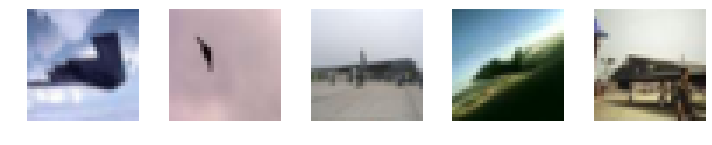

airplane airplane airplane airplane airplane 

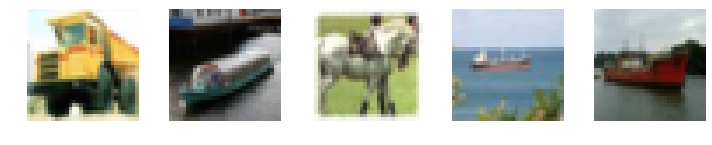

airplane airplane airplane airplane airplane 

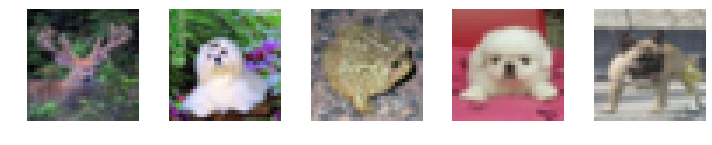

airplane airplane airplane airplane airplane 

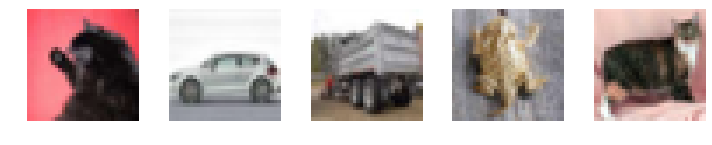

airplane airplane airplane airplane airplane 

In [11]:
pp = np.load('./test_data/y_test.npy')
pp_norm = pp/255
test_res = []
for i in load_model('./modelX.h5').predict(pp_norm):
    print(i)
    test_res.append(np.argmax(i))
    
def plotImages(images_arr,lab):
    from matplotlib import pyplot as plt
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    for i in lab[:5]:
        print(labels_name[i], end=' ')
plotImages(pp,test_res)
plotImages(pp[2400:],test_res[2400:])
plotImages(pp[2400*2:],test_res[2400*2:])
plotImages(pp[2400*3:],test_res[2400*3:])
# summarize_diagnostics(history41)
# summarize_diagnostics(history42)
# summarize_diagnostics(history43)

df = pd.DataFrame({'Category':test_res})
df['Index'] = df.index
df = df[['Index','Category']]
df.to_csv('./test_res5.csv',index=False)

In [12]:
test_res == 0

False

In [4]:
%matplotlib inline